## Preprocessing Text

In [1]:
import pandas as pd  # Mengimpor library pandas untuk manipulasi data
import numpy as np  # Mengimpor library numpy untuk operasi numerik
import seaborn as sns  # Mengimpor library seaborn untuk visualisasi data
import matplotlib.pyplot as plt  # Mengimpor library matplotlib untuk plotting
import nltk  # Mengimpor library NLTK untuk pemrosesan bahasa alami
from nltk.tokenize import word_tokenize  # Mengimpor fungsi word_tokenize dari NLTK untuk tokenisasi kata

c:\Users\ACER\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
data = pd.read_csv("C:/Users/ACER/OneDrive/Documents/Semester 7/KP/SCRAPPING/radar/output.csv") # Memasukkan data yabg sudah dimiliki dengan path tempat menyimpan data nya
data # Menampilkan data

,judul,waktu,isi
0,Terdeteksi Ada 2000 Warga di Lampung Timur Men...,"Jumat 26-07-2024,20:29 WIB",\r\n ...
1,Tok! Pelaku Pemerkosa Tetangga Divonis 10 Tahu...,"Kamis 04-07-2024,19:01 WIB",\r\n ...
2,Geger! IRT di Lampung Timur Ditemukan Tewas Te...,"Kamis 18-07-2024,20:45 WIB",\r\n ...
3,"Ela Siap Berlayar di Pilkada Lampung Timur, Pe...","Senin 22-07-2024,21:02 WIB",\r\n ...
4,Ela Geser Dawam Raharjo sebagai Ketua DPC PKB ...,"Rabu 24-07-2024,20:29 WIB",\r\n ...
...,...,...,...
1890,"Wakapolda Lampung: Sarpras Bukan Hiasan, Tapi ...","Selasa 25-10-2022,13:03 WIB",\r\n ...
1891,Polres Lampung Timur Amankan Pengedar 585 Pil ...,"Selasa 25-10-2022,12:15 WIB",\r\n ...
1892,"15 Danramil Jadi Bapak Asuh Anak Stunting, Apa...","Senin 24-10-2022,15:34 WIB",\r\n ...
1893,"Cegah Polantas Nakal, Polres Lampung Timur Tia...","Senin 24-10-2022,15:27 WIB",\r\n ...


In [3]:
data = data.drop(['waktu','judul'],axis=1) # Menghapus kolom waktu dan isi yang tidak dibutuhkan 
data # Menampilkan data

,isi
0,\r\n ...
1,\r\n ...
2,\r\n ...
3,\r\n ...
4,\r\n ...
...,...
1890,\r\n ...
1891,\r\n ...
1892,\r\n ...
1893,\r\n ...


### Proses case folding, menghapus angka dari kalimat, menghapus tanda baca, menghapus spasi berlebih

In [4]:
import re # Mengimport paket re yang digunakan untuk melakukan opreasi regular expression. Dimana regular expression ini sekumpulan karakter yang membentuk pola pencarian

def proses_banyak(data): # Membuat fungsi dengan nama proses_banyak dan parameter data
    
    case_folding = data.lower() # Menghapus semua huruf kapital

    hapus_angka = re.sub(r"\d+", "", str(case_folding)) # Menghapus angka dari kalimat

    hapus_tanda_baca = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/"" \\ “”]', ' ',str(hapus_angka)) # Menghapus tanda baca yang tida diperlukan

    hasil = hapus_tanda_baca.strip() # Menghapus spasi pada awal dan akhir kalimat

    return hasil # Mengembalikan dari hasil akhir dari proses yang telah dilakukan

In [5]:
data['bersih'] = data['isi'].apply(proses_banyak) # menerapkan fungsi yang sudah dibuat yakni proses_banyak untuk kolom judul lalu membentuk kolom baru dengan nama bersih
data # menampilkan data

,isi,bersih
0,\r\n ...,sedikitnya diperkirakan ada warga yang terse...
1,\r\n ...,terdakwa kasus pemerkosa yang terjadi di keca...
2,\r\n ...,warga desa rajabasa lama kecamatan labuhan ra...
3,\r\n ...,siap berlayar pada pilkada lampung timur untuk...
4,\r\n ...,usai diberi rekomendasi sebagai calon bupati l...
...,...,...
1890,\r\n ...,brigjen subiyanto menggelar kunjungan kerja ke...
1891,\r\n ...,polres lampung timur kembali mengungkap kasus ...
1892,\r\n ...,kodim lampung timur mendukung program pemerin...
1893,\r\n ...,mengimbau masyarakat membantu pemberantasan pu...


### Remove stopword

In [6]:
from nltk.corpus import stopwords  # Mengimpor daftar stopwords dari NLTK

# Daftar kata tambahan yang ingin dihapus selain stopwords
kata_dihapus = ['tok','ta','cjh','ka','akbp','si','kg','km','mi','kepala','dr','berita','aw','r','ag','sk','da','iv','x','e','no','rp','to','radarlampung','id','sc','kh','dd','ap','rd','po','timur','lampung','kecamatan','kabupaten','lamtim','lampung timur','warga','m','cek','artikel','a','e','te','co','h','be','hr','aj','po','yl','st','b']

# Fungsi untuk menghapus stopwords dan kata tambahan dari teks
def remove_stopword(text):
    stop_word = set(stopwords.words('indonesian'))  # Mengambil daftar stopwords bahasa Indonesia dari NLTK
    words = word_tokenize(text)  # Memecah teks menjadi token (kata-kata)
    # Filter kata-kata yang bukan stopwords dan bukan dalam daftar kata_dihapus
    filter_word = [word for word in words if word not in stop_word and word.lower() not in kata_dihapus]
    teks_bersih = ' '.join(filter_word)  # Menggabungkan kata-kata yang telah difilter menjadi satu string
    return teks_bersih  # Mengembalikan teks yang telah dibersihkan

In [7]:
data['stop'] = data['bersih'].apply(remove_stopword) # Menerapkan fungsi untuk membentuk kolom baru dengan nama stop
data # menampilkan data

,isi,bersih,stop
0,\r\n ...,sedikitnya diperkirakan ada warga yang terse...,tersebar desa terdeteksi menganut pendeteksian...
1,\r\n ...,terdakwa kasus pemerkosa yang terjadi di keca...,terdakwa pemerkosa marga kamis sore juli hukum...
2,\r\n ...,warga desa rajabasa lama kecamatan labuhan ra...,desa rajabasa labuhan ratu geger karung berisi...
3,\r\n ...,siap berlayar pada pilkada lampung timur untuk...,berlayar pilkada mencalonkan bupati dpp pkb el...
4,\r\n ...,usai diberi rekomendasi sebagai calon bupati l...,rekomendasi calon bupati pkb partai kebangkita...
...,...,...,...
1890,\r\n ...,brigjen subiyanto menggelar kunjungan kerja ke...,brigjen subiyanto menggelar kunjungan kerja po...
1891,\r\n ...,polres lampung timur kembali mengungkap kasus ...,polres mengungkap peredaran gelap narkoba jeni...
1892,\r\n ...,kodim lampung timur mendukung program pemerin...,kodim mendukung program pemerintah rangka perc...
1893,\r\n ...,mengimbau masyarakat membantu pemberantasan pu...,mengimbau masyarakat membantu pemberantasan pu...


### Stemming

In [8]:
import nltk  # Mengimpor library NLTK untuk pemrosesan bahasa alami
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Mengimpor StemmerFactory dari Sastrawi untuk stemming bahasa Indonesia

# Membuat instance dari StemmerFactory
stem_factory = StemmerFactory()
# Membuat stemmer menggunakan factory
stemmer = stem_factory.create_stemmer()

# Fungsi untuk melakukan stemming pada teks
def stemming(data):
    tokens = nltk.word_tokenize(data)  # Memecah teks menjadi token (kata-kata)
    stemmed_text = [stemmer.stem(token) for token in tokens]  # Melakukan stemming pada setiap token
    return stemmed_text  # Mengembalikan daftar kata yang telah di-stem

In [9]:
data['stemming'] = data['stop'].apply(stemming) # menerapkan fungsi stemming untuk membentuk kolom baru dengan nama stemming
data # menampilkan data

,isi,bersih,stop,stemming
0,\r\n ...,sedikitnya diperkirakan ada warga yang terse...,tersebar desa terdeteksi menganut pendeteksian...,"[sebar, desa, deteksi, anut, deteksi, ungkap, ..."
1,\r\n ...,terdakwa kasus pemerkosa yang terjadi di keca...,terdakwa pemerkosa marga kamis sore juli hukum...,"[dakwa, perkosa, marga, kamis, sore, juli, huk..."
2,\r\n ...,warga desa rajabasa lama kecamatan labuhan ra...,desa rajabasa labuhan ratu geger karung berisi...,"[desa, rajabasa, labuh, ratu, geger, karung, i..."
3,\r\n ...,siap berlayar pada pilkada lampung timur untuk...,berlayar pilkada mencalonkan bupati dpp pkb el...,"[layar, pilkada, calon, bupati, dpp, pkb, ela,..."
4,\r\n ...,usai diberi rekomendasi sebagai calon bupati l...,rekomendasi calon bupati pkb partai kebangkita...,"[rekomendasi, calon, bupati, pkb, partai, bang..."
...,...,...,...,...
1890,\r\n ...,brigjen subiyanto menggelar kunjungan kerja ke...,brigjen subiyanto menggelar kunjungan kerja po...,"[brigjen, subiyanto, gelar, kunjung, kerja, po..."
1891,\r\n ...,polres lampung timur kembali mengungkap kasus ...,polres mengungkap peredaran gelap narkoba jeni...,"[polres, ungkap, edar, gelap, narkoba, jenis, ..."
1892,\r\n ...,kodim lampung timur mendukung program pemerin...,kodim mendukung program pemerintah rangka perc...,"[kodim, dukung, program, perintah, rangka, cep..."
1893,\r\n ...,mengimbau masyarakat membantu pemberantasan pu...,mengimbau masyarakat membantu pemberantasan pu...,"[imbau, masyarakat, bantu, berantas, pungut, l..."


### Visualisasi

In [10]:
from nltk.probability import FreqDist  # Mengimpor FreqDist dari NLTK untuk menghitung distribusi frekuensi kata
import matplotlib.pyplot as plt  # Mengimpor matplotlib.pyplot untuk visualisasi data

# Menggabungkan semua token dari sublist dalam kolom 'token' di DataFrame 'data' menjadi satu list
all_token = [token for sublist in data['stemming'] for token in sublist]

# Menghitung distribusi frekuensi dari semua token
freq_dist = FreqDist(all_token)

# Mencetak daftar kata yang paling sering muncul beserta frekuensinya
print(freq_dist.most_common())

[('sangka', 3408), ('aman', 2359), ('desa', 2212), ('korban', 1973), ('masyarakat', 1899), ('hasil', 1597), ('polres', 1548), ('daerah', 1518), ('covid', 1310), ('laksana', 1205), ('perintah', 1186), ('polsek', 1184), ('kapolres', 1166), ('bupati', 1105), ('dawam', 1074), ('dinas', 1039), ('tingkat', 1019), ('rumah', 1013), ('tugas', 977), ('harap', 940), ('jalan', 923), ('sehat', 915), ('wilayah', 903), ('barang', 867), ('motor', 854), ('lanjut', 842), ('bukti', 825), ('damping', 797), ('wakil', 763), ('jabat', 743), ('duga', 735), ('lapor', 714), ('gelar', 710), ('sepeda', 706), ('sebar', 671), ('ketua', 664), ('milik', 653), ('iptu', 640), ('dasar', 635), ('sukadana', 627), ('dprd', 619), ('bantu', 617), ('kampung', 616), ('curi', 614), ('kerja', 608), ('giat', 603), ('laku', 593), ('kembang', 585), ('personil', 583), ('anggar', 567), ('narkoba', 554), ('salah', 552), ('akp', 549), ('wib', 542), ('tahap', 539), ('ungkap', 538), ('bangun', 530), ('orang', 517), ('anggota', 515), ('wa

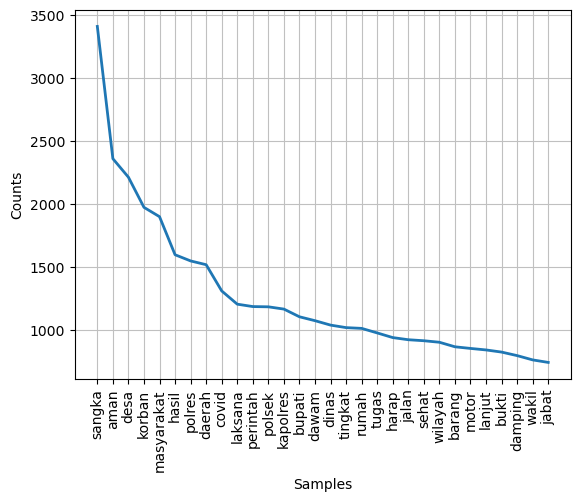

In [11]:
freq_dist.plot(30, cumulative=False)  # Membuat plot distribusi frekuensi untuk 30 kata yang paling sering muncul, tidak kumulatif
plt.show()  # Menampilkan plot

### Model Latent Dirichlet Allocation

In [12]:
import re
import numpy as np
import pandas as  pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\ACER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


PADA TAHAP SETELAH INI KITA AKAN MEMISAHKAN SETIAP KATA LALU AKAN MENGHITUNG MASING-MASING FREKUENSI NYA. INI DIKARENAKAN MODEL YANG KITA GUNAKAN YAKNI LDA (LATENT DIRICHLET ALLOCATION) MEMERLUKAN FREKUENSI SETIAP KATA UNTUK MENGELOMPOKKAN TOPIK DARI KATA KATA TERSEBUT

In [13]:
# Create a Gensim dictionary from the tokenized content
id2word= corpora.Dictionary(data['stemming'])

# Create a Gensim corpus by transforming the tokenized content using the dictionary
corpus = [id2word.doc2bow(text) for text in data['stemming']]

In [14]:
[[(id2word[i],freq)for i, freq in doc] for doc in corpus[:1]]

[[('agama', 3),
  ('alhamdullilah', 1),
  ('alir', 5),
  ('anggota', 1),
  ('anut', 4),
  ('aula', 1),
  ('awas', 2),
  ('cegah', 1),
  ('damai', 1),
  ('damping', 1),
  ('data', 2),
  ('desa', 1),
  ('deteksi', 4),
  ('disdukcapil', 1),
  ('duduk', 1),
  ('gaduh', 1),
  ('gedung', 1),
  ('giat', 1),
  ('harap', 1),
  ('harga', 1),
  ('hidup', 1),
  ('hormat', 1),
  ('intel', 1),
  ('isu', 2),
  ('juli', 1),
  ('jumat', 1),
  ('kait', 1),
  ('kartu', 1),
  ('kasi', 1),
  ('kejar', 2),
  ('kira', 1),
  ('kolom', 1),
  ('kongkrit', 1),
  ('kordinasi', 1),
  ('ktp', 1),
  ('laksana', 1),
  ('lapor', 1),
  ('masyarakat', 1),
  ('pagi', 1),
  ('pakem', 1),
  ('percaya', 6),
  ('potensi', 1),
  ('rapat', 1),
  ('rony', 2),
  ('sebar', 1),
  ('syah', 1),
  ('syahrul', 2),
  ('tanda', 1),
  ('timbul', 1),
  ('toleransi', 1),
  ('tuju', 1),
  ('tulis', 1),
  ('turut', 1),
  ('ubah', 1),
  ('umat', 1),
  ('ungkap', 1)]]

### Penentuan jumlah topik optimum dan Inisiasi Model

In [15]:
def jumlah_topik_optimum(dictionary,corpus,text,limit,start,step):
    coherence_score = []
    model_list = []
    for jumlah_topik in range(start,limit,step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=jumlah_topik, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model,texts=text,dictionary=dictionary,coherence='c_v')
        coherence_score.append(coherencemodel.get_coherence())
    return model_list,coherence_score

In [16]:
model,coherence_score = jumlah_topik_optimum(dictionary=id2word,corpus=corpus,text= data['stemming'],start=2,limit=40,step=6)

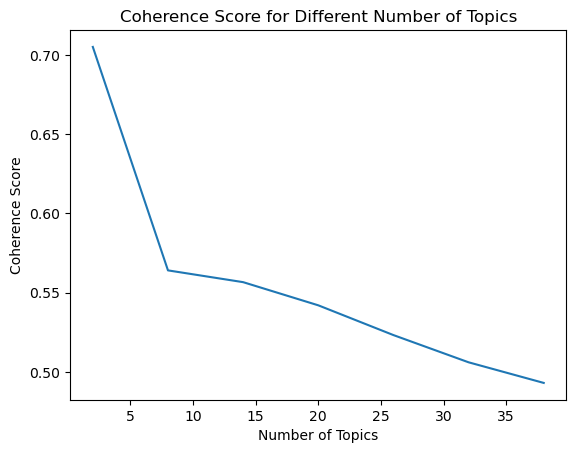

Optimal number of topics: 2


In [17]:
# Plot coherence scores
import matplotlib.pyplot as plt

x = range(2, 40, 6)
plt.plot(x, coherence_score)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Different Number of Topics")
plt.show()

# Print the optimal number of topics
optimal_num_topics = x[coherence_score.index(max(coherence_score))]
print(f'Optimal number of topics: {optimal_num_topics}')

In [26]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [28]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [29]:
get_lda_topics(lda_model, 7)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07
0,sehat,aman,desa,polres,tenaga,sangka,daerah
1,sebar,sangka,masyarakat,kapolres,seleksi,korban,dprd
2,vaksinasi,polres,covid,aman,daftar,aman,jabat
3,jalan,barang,dawam,personil,calon,polsek,rapat
4,masyarakat,narkoba,harap,operasi,pegawai,motor,anggar
5,konfirmasi,bukti,bupati,kendara,lamar,hasil,wakil
6,tingkat,ungkap,perintah,tugas,pppk,desa,miliar
7,hari,informasi,tingkat,laksana,tahap,sepeda,asn
8,lanjut,sabu,bantu,gelar,perintah,rumah,ketua
9,cegah,wilayah,layan,polri,kerja,lapor,dapat


In [30]:
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"sehat" + 0.022*"sebar" + 0.016*"vaksinasi" + 0.015*"jalan" + '
  '0.014*"masyarakat" + 0.013*"konfirmasi" + 0.013*"tingkat" + 0.012*"hari" + '
  '0.011*"lanjut" + 0.011*"cegah"'),
 (1,
  '0.048*"aman" + 0.045*"sangka" + 0.033*"polres" + 0.026*"barang" + '
  '0.025*"narkoba" + 0.025*"bukti" + 0.019*"ungkap" + 0.018*"informasi" + '
  '0.017*"sabu" + 0.016*"wilayah"'),
 (2,
  '0.023*"desa" + 0.020*"masyarakat" + 0.017*"covid" + 0.016*"dawam" + '
  '0.013*"harap" + 0.013*"bupati" + 0.010*"perintah" + 0.010*"tingkat" + '
  '0.009*"bantu" + 0.008*"layan"'),
 (3,
  '0.037*"polres" + 0.024*"kapolres" + 0.021*"aman" + 0.016*"personil" + '
  '0.015*"operasi" + 0.012*"kendara" + 0.012*"tugas" + 0.012*"laksana" + '
  '0.011*"gelar" + 0.010*"polri"'),
 (4,
  '0.028*"tenaga" + 0.024*"seleksi" + 0.021*"daftar" + 0.021*"calon" + '
  '0.019*"pegawai" + 0.019*"lamar" + 0.019*"pppk" + 0.016*"tahap" + '
  '0.015*"perintah" + 0.014*"kerja"'),
 (5,
  '0.041*"sangka" + 0.031*"korban" + 0.021*"

In [31]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.


Perplexity:  -7.0423910803113525


In [32]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data["stemming"], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)

nCoherence Score:  0.70348178063321


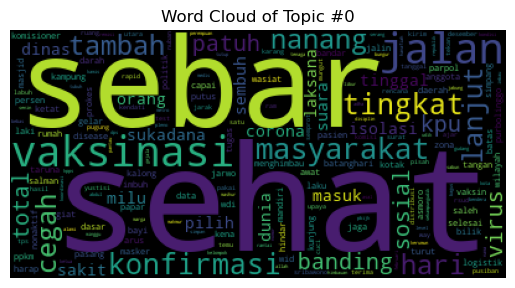

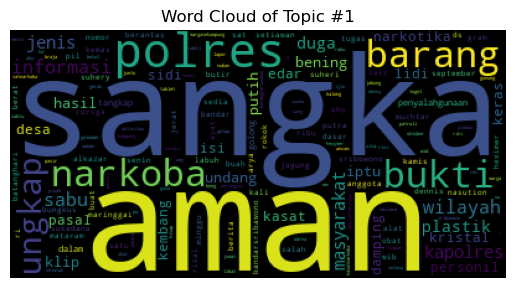

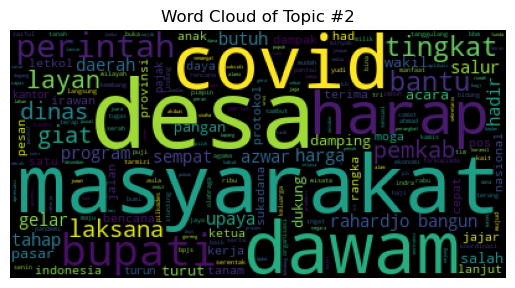

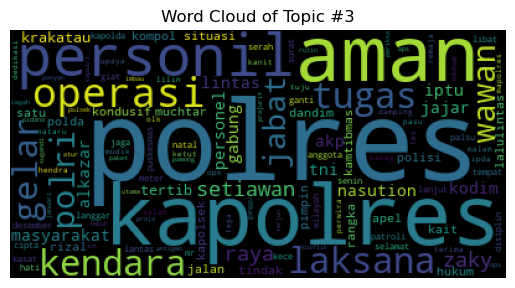

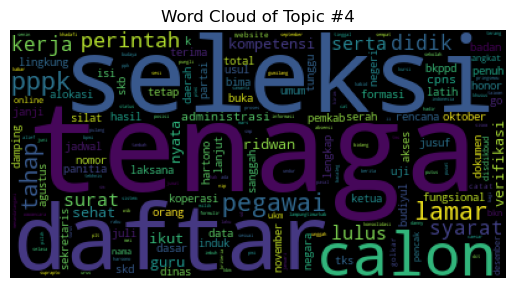

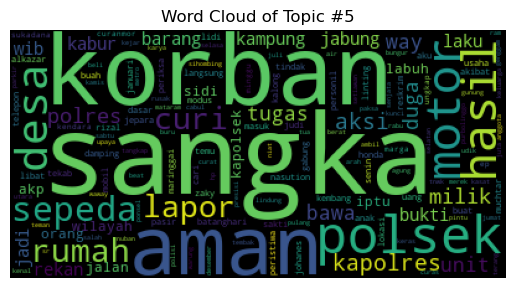

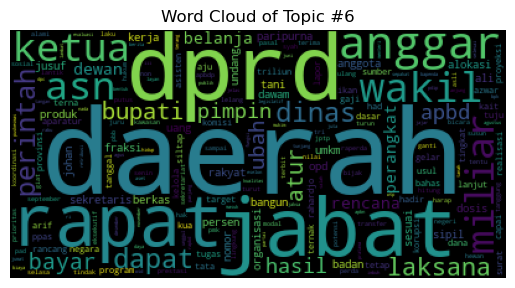

In [34]:
from wordcloud import WordCloud

# Function to create word cloud for each topic
def plot_word_cloud(lda_model, num_topics):
    for t in range(num_topics):
        plt.figure()
        plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 200))))
        plt.axis("off")
        plt.title("Word Cloud of Topic #" + str(t))
        plt.show()

# Plot word cloud for each topic
plot_word_cloud(lda_model, 7)

In [35]:
import pyLDAvis
import pyLDAvis.gensim
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.232274 -0.021948       1        1  26.910334
2     -0.153741  0.114858       2        1  25.739917
6     -0.203003  0.159931       3        1  16.589141
0     -0.090590 -0.298395       4        1   9.871372
1      0.262311  0.023366       5        1   7.736152
3      0.149336  0.076386       6        1   6.694236
4     -0.196587 -0.054200       7        1   6.458846, topic_info=          Term         Freq        Total Category  logprob  loglift
398     sangka  3340.000000  3340.000000  Default  30.0000  30.0000
314       aman  2430.000000  2430.000000  Default  29.0000  29.0000
162     polres  1611.000000  1611.000000  Default  28.0000  28.0000
80      korban  1921.000000  1921.000000  Default  27.0000  27.0000
380   kapolres  1183.000000  1183.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1379  lingkung   113.579755   227.015884   Topic7  -4.8664   2.0472
1601     jusuf   119.095216   301.713089   Topic7  -4.8190   1.8102
1390     sehat   147.481919   977.182881   Topic7  -4.6052   0.8488
717      badan   112.693145   441.893793   Topic7  -4.8742   1.3733
375      hasil   123.482771  1601.213930   Topic7  -4.7828   0.1773

[433 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1065      2  0.983059         acara
1065      3  0.014457         acara
1533      2  0.083215  administrasi
1533      3  0.065383  administrasi
1533      7  0.844038  administrasi
...     ...       ...           ...
621       2  0.996187        zaiful
3690      1  0.552927          zaky
3690      5  0.161006          zaky
3690      6  0.283878          zaky
1634      4  0.992994          zona

[706 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 7, 1, 2, 4, 5])